In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
training_set = pd.read_csv("4-GSP_Train.csv") 

In [3]:
training_set = training_set.iloc[:,1:2].values

# Select only the second column from the DataFrame (likely the target variable) and convert it to a NumPy array

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)

In [5]:
X_train = training_set[0:1257]  # Takes rows 0 to 1256 (inclusive) → 1257 values
y_train = training_set[1:1258]  # Takes rows 1 to 1257 (inclusive) → next 1257 values

In [6]:
X_train = np.reshape(X_train, (1257, 1, 1))

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


In [8]:
# Initialize the RNN
regressor = Sequential()

# Add the LSTM layer
# units = 4: Number of memory units (neurons) in the LSTM layer
# activation = 'sigmoid': Activation function used inside the LSTM
# input_shape = (None, 1): Input shape where:
#   - None means variable number of time steps
#   - 1 means one feature per time step (i.e., univariate time series)
regressor.add(LSTM(units=4, activation='sigmoid', input_shape=(None, 1)))

# Add the output layer
# Dense layer with 1 unit since we’re predicting a single value
regressor.add(Dense(units=1))

# Compile the RNN
# optimizer = 'adam': Adaptive optimizer for efficient training
# loss = 'mean_squared_error': Suitable loss function for regression problems
regressor.compile(optimizer='adam', loss='mean_squared_error')

# Fit the RNN to the training set
# batch_size = 32: Number of samples per gradient update
# epochs = 200: Number of training iterations over the full dataset
regressor.fit(X_train, y_train, batch_size=32, epochs=200)

Epoch 1/200


c:\python 39\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1561
Epoch 2/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1176
Epoch 3/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0923
Epoch 4/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0815
Epoch 5/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0789
Epoch 6/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0717
Epoch 7/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0744
Epoch 8/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0727
Epoch 9/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0711
Epoch 10/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0682
Epoch 11/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0692
Epoch 12/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0689
Epoch 13/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0692
Epoch 14/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0667
Epoch 15/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0642
Epoch 16/200
40/

In [9]:
test_set = pd.read_csv('4-GSP_Test.csv')
real_stock_price = test_set.iloc[:,1:2].values
# Read the test dataset from the CSV file and extract the second column (real stock prices) as a NumPy array

In [11]:
# Prepare the real stock prices for prediction
# - `inputs = real_stock_price`: Set the real stock prices as inputs
# - `sc.transform(inputs)`: Scale the inputs using the same scaler as for training data
# - `np.reshape(inputs, (20, 1, 1))`: Reshape inputs to match the LSTM's expected 3D input shape (20 samples, 1 time step, 1 feature per time step)

# Scale and reshape the real stock prices for LSTM prediction
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (20, 1, 1))

# Predict using the trained model
predicted_stock_price = regressor.predict(inputs)

# Inverse transform the predictions to get them back to original scale
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

predicted_stock_price = regressor.predict(inputs)  # Predict stock prices using the trained LSTM model
predicted_stock_price = sc.inverse_transform(predicted_stock_price)  # Inverse scale the predicted prices to the original scale


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


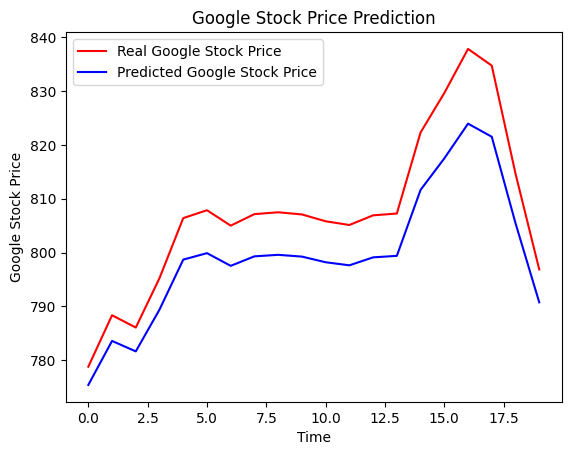

In [12]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


In [14]:
# Read the training dataset from the CSV file and extract the second column (Google stock prices) as a NumPy array
real_stock_price_train = pd.read_csv('4-GSP_Train.csv')  # Load the dataset
real_stock_price_train = real_stock_price_train.iloc[:,1:2].values  # Extract the second column (stock prices) as a NumPy array


In [16]:
# Predict stock prices on the training data using the trained LSTM model
predicted_stock_price_train = regressor.predict(X_train)  # Use the model to predict stock prices for the training data
predicted_stock_price_train = sc.inverse_transform(predicted_stock_price_train)  # Inverse scale the predicted prices back to the original scale

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


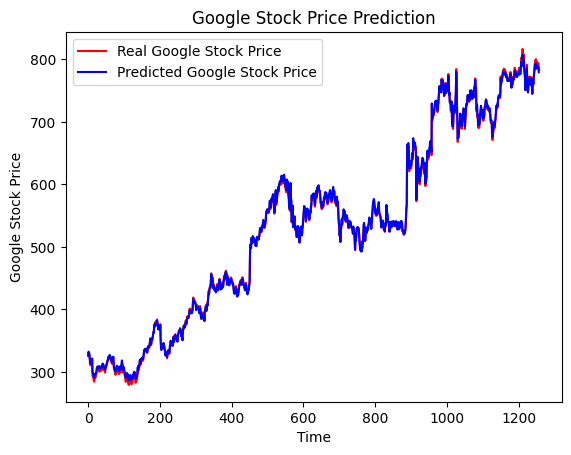

In [17]:
plt.plot(real_stock_price_train, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price_train, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
 

In [18]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price)) 

In [19]:
rmse 

8.48070081542133